In [100]:
from sklearn import datasets
from sklearn import metrics
from sklearn import tree
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier
from sklearn.inspection import DecisionBoundaryDisplay

import matplotlib.pyplot as plt
import numpy as np
import numpy.typing as npt
from functools import reduce

In [2]:
data = datasets.load_iris()

In [8]:
print(data.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

:Number of Instances: 150 (50 in each of three classes)
:Number of Attributes: 4 numeric, predictive attributes and the class
:Attribute Information:
    - sepal length in cm
    - sepal width in cm
    - petal length in cm
    - petal width in cm
    - class:
            - Iris-Setosa
            - Iris-Versicolour
            - Iris-Virginica

:Summary Statistics:

============== ==== ==== ======= ===== ====================
                Min  Max   Mean    SD   Class Correlation
============== ==== ==== ======= ===== ====================
sepal length:   4.3  7.9   5.84   0.83    0.7826
sepal width:    2.0  4.4   3.05   0.43   -0.4194
petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
============== ==== ==== ======= ===== ====================

:Missing Attribute Values: None
:Class Distribution: 33.3% for each of 3 classes.
:Cr

In [24]:
def print_metrics(trues, preds):
    f1 = metrics.f1_score(trues, preds, average='macro')
    precision = metrics.precision_score(trues, preds, average='macro')
    recall = metrics.recall_score(trues, preds, average='macro')
    print(f"precision: {precision}\nrecall: {recall}\nF1: {f1}")


def make_conf_matrix(trues, preds, labels):
    confusion_matrix = metrics.confusion_matrix(trues, preds)
    cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix=confusion_matrix, display_labels=sorted(labels))
    cm_display.plot()

In [14]:
from sklearn.model_selection import train_test_split

In [17]:
X_train, X_test, y_train, y_test = train_test_split(data.data, data.target, random_state=313, test_size=0.2)

In [32]:
tree_clf = tree.DecisionTreeClassifier(random_state=313)
tree_clf.fit(X_train, y_train)

DecisionTreeClassifier(random_state=313)

precision: 0.8888888888888888
recall: 0.9010989010989011
F1: 0.8933333333333334


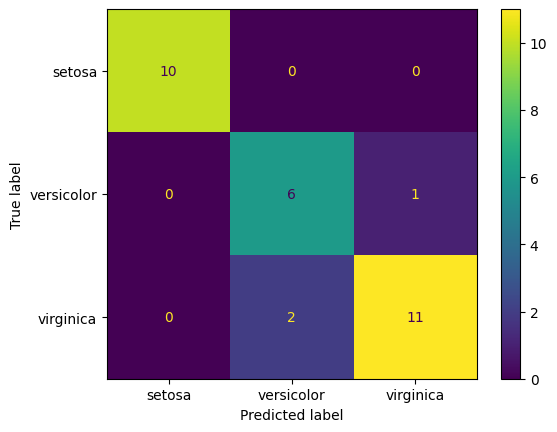

In [28]:
predicts = tree.predict(X_test)
print_metrics(y_test, predicts)
make_conf_matrix(y_test, predicts, labels=data.target_names)

[Text(0.375, 0.9, 'x[2] <= 2.45\ngini = 0.665\nsamples = 120\nvalue = [40, 43, 37]'),
 Text(0.25, 0.7, 'gini = 0.0\nsamples = 40\nvalue = [40, 0, 0]'),
 Text(0.3125, 0.8, 'True  '),
 Text(0.5, 0.7, 'x[3] <= 1.65\ngini = 0.497\nsamples = 80\nvalue = [0, 43, 37]'),
 Text(0.4375, 0.8, '  False'),
 Text(0.25, 0.5, 'x[2] <= 5.45\ngini = 0.045\nsamples = 43\nvalue = [0, 42, 1]'),
 Text(0.125, 0.3, 'gini = 0.0\nsamples = 42\nvalue = [0, 42, 0]'),
 Text(0.375, 0.3, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1]'),
 Text(0.75, 0.5, 'x[2] <= 4.85\ngini = 0.053\nsamples = 37\nvalue = [0, 1, 36]'),
 Text(0.625, 0.3, 'x[1] <= 3.1\ngini = 0.375\nsamples = 4\nvalue = [0, 1, 3]'),
 Text(0.5, 0.1, 'gini = 0.0\nsamples = 3\nvalue = [0, 0, 3]'),
 Text(0.75, 0.1, 'gini = 0.0\nsamples = 1\nvalue = [0, 1, 0]'),
 Text(0.875, 0.3, 'gini = 0.0\nsamples = 33\nvalue = [0, 0, 33]')]

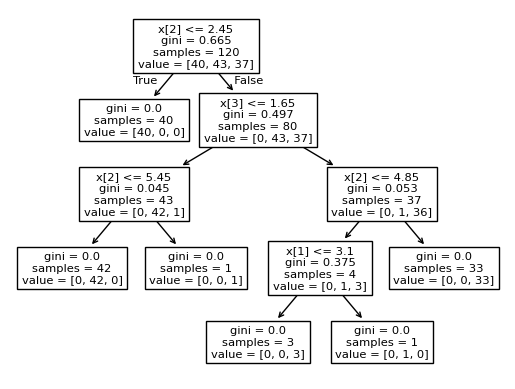

In [33]:
tree.plot_tree(tree_clf)

In [37]:
bagging = BaggingClassifier(n_estimators=50, max_samples=0.75, n_jobs=-1, random_state=313)
bagging.fit(X_train, y_train)

BaggingClassifier(max_samples=0.75, n_estimators=50, n_jobs=-1,
                  random_state=313)

precision: 0.8585858585858586
recall: 0.8754578754578755
F1: 0.8611111111111112


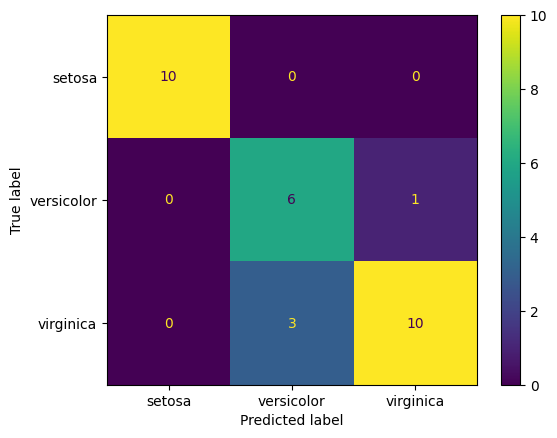

In [38]:
predicts = bagging.predict(X_test)
print_metrics(y_test, predicts)
make_conf_matrix(y_test, predicts, labels=data.target_names)

[Text(0.3333333333333333, 0.875, 'x[2] <= 2.5\ngini = 0.655\nsamples = 60\nvalue = [34, 34, 22]'),
 Text(0.16666666666666666, 0.625, 'gini = 0.0\nsamples = 22\nvalue = [34, 0, 0]'),
 Text(0.25, 0.75, 'True  '),
 Text(0.5, 0.625, 'x[3] <= 1.7\ngini = 0.477\nsamples = 38\nvalue = [0, 34, 22]'),
 Text(0.41666666666666663, 0.75, '  False'),
 Text(0.3333333333333333, 0.375, 'gini = 0.0\nsamples = 21\nvalue = [0, 33, 0]'),
 Text(0.6666666666666666, 0.375, 'x[2] <= 4.85\ngini = 0.083\nsamples = 17\nvalue = [0, 1, 22]'),
 Text(0.5, 0.125, 'gini = 0.0\nsamples = 1\nvalue = [0, 1, 0]'),
 Text(0.8333333333333334, 0.125, 'gini = 0.0\nsamples = 16\nvalue = [0, 0, 22]')]

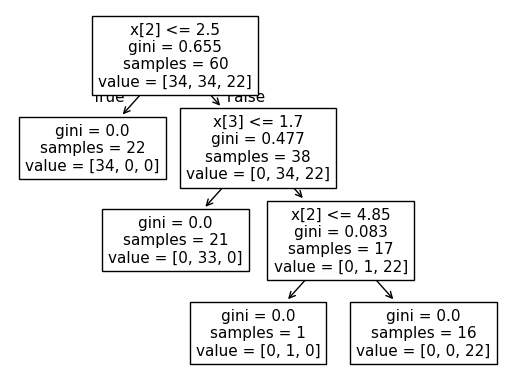

In [39]:
tree.plot_tree(bagging.estimators_[13])

In [46]:
forest = RandomForestClassifier(n_estimators=50, max_samples=0.75, max_depth=2, n_jobs=-1, random_state=313)
forest.fit(X_train, y_train)

RandomForestClassifier(max_depth=2, max_samples=0.75, n_estimators=50,
                       n_jobs=-1, random_state=313)

precision: 0.8585858585858586
recall: 0.8754578754578755
F1: 0.8611111111111112


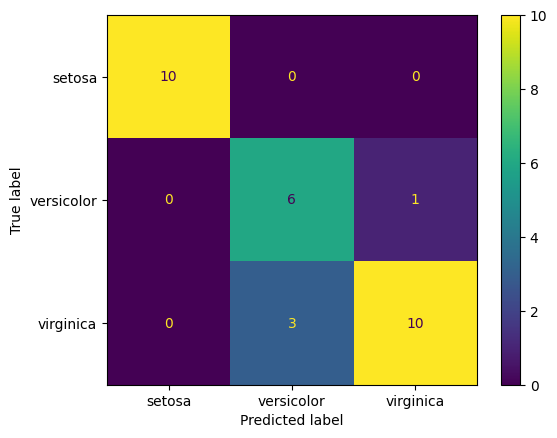

In [47]:
predicts = forest.predict(X_test)
print_metrics(y_test, predicts)
make_conf_matrix(y_test, predicts, labels=data.target_names)

[Text(0.4, 0.8333333333333334, 'x[3] <= 0.8\ngini = 0.655\nsamples = 60\nvalue = [34, 34, 22]'),
 Text(0.2, 0.5, 'gini = 0.0\nsamples = 22\nvalue = [34, 0, 0]'),
 Text(0.30000000000000004, 0.6666666666666667, 'True  '),
 Text(0.6, 0.5, 'x[3] <= 1.7\ngini = 0.477\nsamples = 38\nvalue = [0, 34, 22]'),
 Text(0.5, 0.6666666666666667, '  False'),
 Text(0.4, 0.16666666666666666, 'gini = 0.0\nsamples = 21\nvalue = [0, 33, 0]'),
 Text(0.8, 0.16666666666666666, 'gini = 0.083\nsamples = 17\nvalue = [0, 1, 22]')]

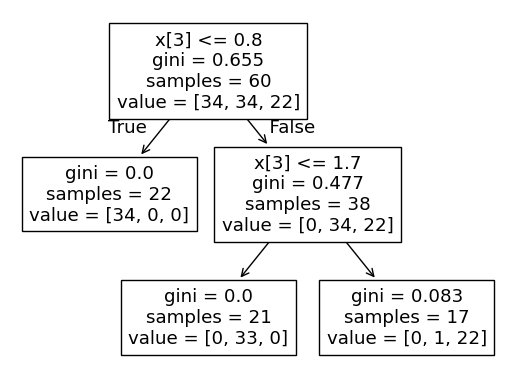

In [48]:
tree.plot_tree(forest.estimators_[13])

In [86]:
f2, f3 = np.meshgrid(
    np.linspace(data.data[:, 2].min(), data.data[:, 2].max()),
    np.linspace(data.data[:, 3].min(), data.data[:, 3].max())
)
grid = np.vstack([f2.ravel(), f3.ravel()]).T

In [88]:
tree_disp = DecisionTreeClassifier().fit(data.data[:, 2:], data.target)
y_pred = np.reshape(tree_disp.predict(grid), f2.shape)

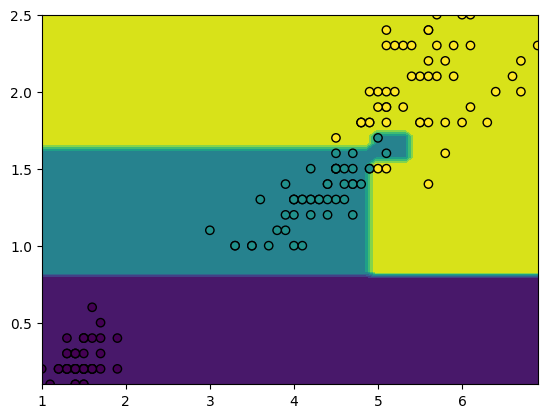

In [93]:
display = DecisionBoundaryDisplay(xx0=f2, xx1=f3, response=y_pred)
display.plot()
display.ax_.scatter(data.data[:, 2], data.data[:, 3], c=data.target, edgecolor="black")
plt.show()